In [1]:
import pandas as pd
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("StartUpsESG_0602.csv")

# Pré-Processamento de dados

In [3]:
df = df[['StartUp', 'Country', 'ESG', 'E', 'S', 'G', 'Raised']]
df['ESG'] = df['ESG'].str.replace(',', '.').astype(float)
df['E'] = df['E'].str.replace(',', '.').astype(float)
df['S'] = df['S'].str.replace(',', '.').astype(float)
df['G'] = df['G'].str.replace(',', '.').astype(float)
df['Raised'] = df['Raised'].str.replace(',', '.').astype(float)
df

,StartUp,Country,ESG,E,S,G,Raised
0,VenusEnergy,Lithuania,0.010,0.008,0.002,0.000,5986183.0
1,GreenEnergyCoin,Netherlands,0.018,0.010,0.006,0.002,0.0
2,HydroMiner,Austria,0.014,0.010,0.000,0.004,3500000.0
3,PowerCorp,"Hong Kong SAR, China",0.008,0.006,0.000,0.002,0.0
4,Emyron Coin,United States,0.017,0.000,0.011,0.006,0.0
...,...,...,...,...,...,...,...
6536,SUPP Network,United States,0.000,0.000,0.000,0.000,0.0
6537,Thousand Token,Colombia,0.000,0.000,0.000,0.000,0.0
6538,Cryptocurrency Market,Spain,0.000,0.000,0.000,0.000,0.0
6539,IQ Token,Belarus,0.000,0.000,0.000,0.000,0.0


In [4]:
X = df[['Raised', 'ESG', 'E', 'S', 'G']]
X

,Raised,ESG,E,S,G
0,5986183.0,0.010,0.008,0.002,0.000
1,0.0,0.018,0.010,0.006,0.002
2,3500000.0,0.014,0.010,0.000,0.004
3,0.0,0.008,0.006,0.000,0.002
4,0.0,0.017,0.000,0.011,0.006
...,...,...,...,...,...
6536,0.0,0.000,0.000,0.000,0.000
6537,0.0,0.000,0.000,0.000,0.000
6538,0.0,0.000,0.000,0.000,0.000
6539,0.0,0.000,0.000,0.000,0.000


In [5]:
data = X.values

# Self-Organazing Maps

In [6]:
som_shape = (12, 12)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=1.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(data)
som.train(data, 1000, verbose=True)

C:\Users\joaof\AppData\Local\Programs\Python\Python39\lib\site-packages\minisom.py:388: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [  816 / 1000 ]  82% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 144828.63047128636


In [7]:
winner_coordinates = np.array([som.winner(x) for x in data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
winner_coordinates

array([[4, 0, 3, ..., 0, 0, 0],
       [3, 0, 3, ..., 0, 0, 0]], dtype=int64)

No handles with labels found to put in legend.


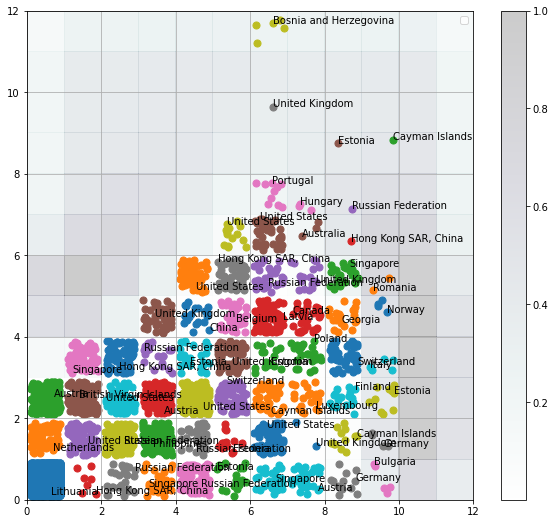

In [8]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

ar_x = []
ar_y = []
for c in np.unique(cluster_index):
#    idx_target = target==c
    coords_x = w_x[cluster_index == c]+.5+(np.random.rand(np.sum(cluster_index == c))-.5)*.8
    coords_y = w_y[cluster_index == c]+.5+(np.random.rand(np.sum(cluster_index == c))-.5)*.8
    plt.scatter(coords_x, coords_y, s=50)
    ar_x.append(coords_x[0])
    ar_y.append(coords_y[0])
    
for i in ar_x:
    pos = ar_x.index(i)
    plt.text(ar_x[pos], ar_y[pos], df['Country'][pos])
    
plt.legend(loc='upper right')
plt.grid()

No handles with labels found to put in legend.


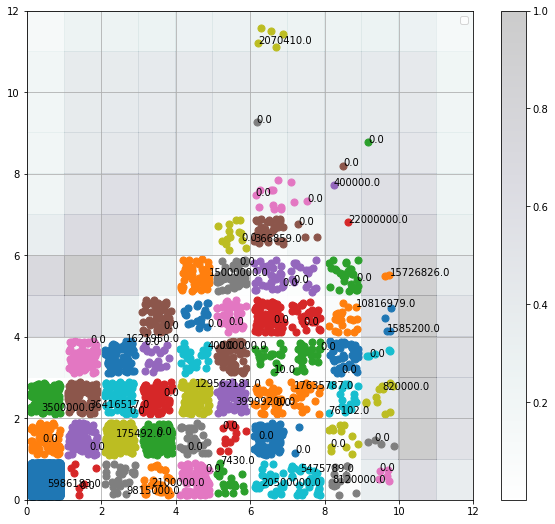

In [9]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

ar_x = []
ar_y = []
for c in np.unique(cluster_index):
#    idx_target = target==c
    coords_x = w_x[cluster_index == c]+.5+(np.random.rand(np.sum(cluster_index == c))-.5)*.8
    coords_y = w_y[cluster_index == c]+.5+(np.random.rand(np.sum(cluster_index == c))-.5)*.8
    plt.scatter(coords_x, coords_y, s=50)
    ar_x.append(coords_x[0])
    ar_y.append(coords_y[0])
    
for i in ar_x:
    pos = ar_x.index(i)
    plt.text(ar_x[pos], ar_y[pos], df['Raised'][pos])
    
plt.legend(loc='upper right')
plt.grid()

# Visualizing High Dimension Cluster

In [10]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0,1))
sc.fit(X)
X=sc.transform(X)

In [11]:
# Criando um vetor de cópia da coluna dos países
countries = np.array([])

for ctry in df['Country'].values:
    countries = np.append(countries, ctry)

In [12]:
# Associando um valor numérico para cada país
i = 1
for ctry in countries:
    has = False
    for j in range(0, len(countries)):
        if df['Country'].values[j] == ctry:
            df['Country'].values[j] = i
            has = True
    if has:
        i = i + 1
countries

array(['Lithuania', 'Netherlands', 'Austria', ..., 'Spain', 'Belarus',
       'Thailand'], dtype='<U32')

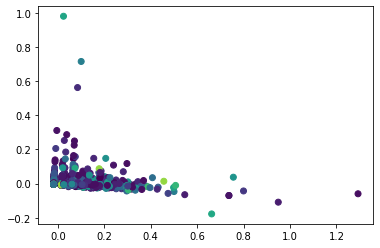

In [13]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c = df['Country'])
plt.show()

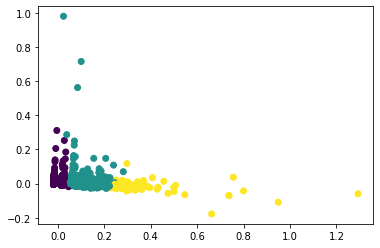

In [14]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c = kmeans.labels_)
plt.show()

In [15]:
cluster_esg = {}
for i in range(kmeans.n_clusters):
    cluster_esg[i] = []
    for j in range(len(df)):
        if kmeans.labels_[j] == i:
            cluster_esg[i].append(df['ESG'][j])

cluster_esg_mean = {cluster_id: np.mean(esg_values) for cluster_id, esg_values in cluster_esg.items()}
cluster_esg_mean

{0: 7.871321013004791e-05, 1: 0.0064128, 2: 0.019180555555555555}